## Database notebook

This will explore and help understand how to connect to postgres database, retrieve information and also update the information in it. The package used in psycopg2 and the notes here will help in developing the python scripts that will be run in this project

Start by installing the python package for connecting to PostgreSQL database which is psycopg2

In [ ]:
#Connect to postgres
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="@Ebuka79")

cur = conn.cursor()

cur.execute('SELECT version()')

print(cur.fetchone())

#cur.close()

In [ ]:
#create a table in the database

create_command = """
CREATE TABLE Test(
    firstname VARCHAR(15),
    lastname VARCHAR(15),
    age INT,
    location VARCHAR(2),
    occupation VARCHAR(10)
)
"""

cuq.execute(create_command)

cuq.close()

conn.commit()

print("Table creation successful")

conn.close()



In [ ]:
#insert values into test table in database

insert_com = """
INSERT INTO 
    test (firstname,lastname,age,location,occupation)
VALUES
    ('Ebuka','Ifechukwu',24,'LG','Engineer'),
    ('Chidera','Ifechukwu',23,'UK','Media'),
    ('Ugonna','Ifechukwu',19,'EN','Lawyer'),
    ('Uchenna','Ifechukwu',19,'LG','Designer')
"""

cuq.execute(insert_com)

cuq.close()

conn.commit()

print("Values added successfully")

conn.close()

Note: if a transaction or command was not successful, it cannot be redone until the connection to the database has been closed and opened again. Best to do an exception to avoid this

In [ ]:
#obtain data from database
import pandas as pd

retrieve_com = """
SELECT * 
FROM test
"""

cur.execute(retrieve_com)

data = cur.fetchall()

print(data)

cur.close()

conn.close()

In [ ]:
{
    "tags": [
        "hide-input",
    ]
}

data

In [ ]:
#convert the list of tuples to dataframe in pandas for more analysis

pd_data = pd.DataFrame(data, columns=['firstname','lastname','age','location','occupation'])

pd_data

In [ ]:
#connecting to a different database to obtain data and put in pandas dataframe for analysis

import psycopg2
import pandas as pd

conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="@Ebuka79")

cur = conn.cursor()

cur.execute('SELECT version()')

retrieve_com = """
SELECT * 
FROM product
"""

cur.execute(retrieve_com)

data = cur.fetchall()

pd_data = pd.DataFrame(data, columns=['productkey','productname','price','quantity','categorykey'])

cur.close()

conn.close()


In [ ]:
pd_data.head()

In [ ]:
pd_data.columns

In [ ]:
pd_data.groupby('categorykey')['productkey'].describe()

In [ ]:
#call a function in the database

cur.callproc('seldata','2')

In [ ]:
cur.fetchall()

In [ ]:
cur.callproc('seldata','3')

In [ ]:
cur.fetchall()

In [ ]:
cur.execute("CALL selectdata(2);")

In [ ]:
cur.close()
conn.close()

In [ ]:
#connecting to a different database to obtain data and put in pandas dataframe for analysis

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt


conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="@Ebuka79")

cur = conn.cursor()

cur.execute('SELECT version()')

retrieve_com = """
SELECT * 
FROM test1_view
"""

cur.execute(retrieve_com)

data = cur.fetchall()

pd_data = pd.DataFrame(data, columns=['productkey','quantity','categorykey'])

plt.figure(figsize=(10,8))
plt.barh(pd_data['productkey'], pd_data['quantity'])
plt.show()

cur.close()

conn.close()


In [ ]:
# searching for particular information within a datatable gotten from the database
pd_data.query("productkey=='Sugar'")

In [ ]:
search = pd_data.query("productkey=='Sugar'")
search['quantity'][0]

In [ ]:
pd_data.groupby('categorykey').describe()

In [ ]:
#function for opening and closing connection to postgres

def pg_connect(status,*var):

    global cur 
    
    if status == 'connect':
        cur = psycopg2.connect(
        host="localhost",
        database="postgres",
        user="postgres",
        password="@Ebuka79")
        return cur.cursor()

    elif status == 'close':
        var[0].close()
        cur.close()
        print('connection closed')

    else:
        stat = input('status code incorrect please select either connect or stop: ')
        pg_connect(stat)

    

In [ ]:
import psycopg2
import pandas as pd

test = pg_connect('connect')

In [ ]:
test.execute('SELECT version()')
test.fetchone()
#test.close()

In [ ]:
pg_connect('close',(test))

In [ ]:
item = 'bread'
quantity = 3

print(f"""
        INSERT INTO test_purchase(product,quantity,pk)
        VALUES
        ({item},{quantity},1)""")

In [ ]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="@Ebuka79")

cur = conn.cursor()

#cur.execute('SELECT version()')

retrieve_com = """
        SELECT quantity
        FROM product
        WHERE productkey = 2
"""

cur.execute(retrieve_com)

data = cur.fetchone()

#pd_data = pd.DataFrame(data, columns=['productkey','productname','price','quantity','categorykey'])
print(data[0])
cur.close()

conn.close()


In [ ]:
import db_interact
from db_interact import pg_db

db = pg_db()
db.pg_connect('connect')

#db.test_run()

test_query = 'SELECT productname,price FROM product WHERE categorykey=1'
#print(db.view())
#db.test()
db.cur.execute(test_query)
test_dt = db.cur.fetchall()

#db.pg_connect('close')

In [ ]:
test_dt

In [ ]:
db.run_query(test_query)

In [ ]:
db.pg_connect('close')

In [9]:
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import db_interact
from db_interact import pg_db

db = pg_db()
db.pg_connect('connect')

#db.test_run()

test_query = 'SELECT productname,price FROM product WHERE categorykey=1'

test_dt = db.run_query(test_query)

#db.pg_connect('close')

In [11]:
#queries to use in the initialisation of the class to obtain information from the database
stockcountquery = 'SELECT productname, quantity FROM product'
productkeyquery = 'SELECT productkey,productname FROM product'
foodquery = 'SELECT productname,price FROM product WHERE categorykey=1'
householdquery = 'SELECT productname,price FROM product WHERE categorykey=2'
clothquery = 'SELECT productname,price FROM product WHERE categorykey=3'

In [14]:
scq = pd.DataFrame(db.run_query(stockcountquery), columns=['productname','quantity'])
pkq = pd.DataFrame(db.run_query(productkeyquery), columns=['productkey','productname'])
fq = pd.DataFrame(db.run_query(foodquery), columns=['productname','price'])
hhq = pd.DataFrame(db.run_query(householdquery), columns=['productname','price'])
cq = pd.DataFrame(db.run_query(clothquery), columns=['productname','price'])

In [23]:
scq.query("productname=='Sugar'")

,productname,quantity
0,Sugar,1000


In [46]:
product  = input("Enter what you want to buy: ")
num = scq.query(f"productname=='{product}'")["quantity"].iloc[0]

In [47]:
num

1000

In [26]:
test_dict = {}
test_dict['food'] = fq
test_dict['household'] = hhq
test_dict['clothes'] = cq

In [38]:
y = test_dict['food'].query("productname=='Butter'")

In [45]:
y['price'].iloc[0]

400

In [44]:
type(y)

pandas.core.frame.DataFrame

In [54]:
#converting datatable to dict
#scq.set_index('productname',inplace=True)
scq_dict = scq.to_dict()['quantity']
scq_dict

{'Sugar': 1000,
 'Spagetti': 1000,
 'Chair': 50,
 'Kettle': 50,
 'Iron': 50,
 'Blender': 50,
 'Rechargeable Fan': 25,
 'Fan': 25,
 'Extension': 50,
 'Table': 25,
 'Shirt': 100,
 'Polo shirt': 100,
 'Trousers': 100,
 'Chinos': 100,
 'Skirt': 100,
 'Jeans': 100,
 'Blouse': 100,
 'boxers': 2000,
 'Egg': 1000,
 'Indomie': 1000,
 'Butter': 1000,
 'Milk': 1000,
 'Salt': 1000,
 'Chin-chin': 2000,
 'Biscuit': 2000,
 'Bread': 500}

In [72]:
x = pd.DataFrame(db.run_query(stockcountquery), columns=['productname','quantity'])

In [73]:
x.set_index('productname',inplace=True)
x.to_dict()['quantity']

{'Sugar': 1000,
 'Spagetti': 1000,
 'Chair': 50,
 'Kettle': 50,
 'Iron': 50,
 'Blender': 50,
 'Rechargeable Fan': 25,
 'Fan': 25,
 'Extension': 50,
 'Table': 25,
 'Shirt': 100,
 'Polo shirt': 100,
 'Trousers': 100,
 'Chinos': 100,
 'Skirt': 100,
 'Jeans': 100,
 'Blouse': 100,
 'boxers': 2000,
 'Egg': 1000,
 'Indomie': 1000,
 'Butter': 1000,
 'Milk': 1000,
 'Salt': 1000,
 'Chin-chin': 2000,
 'Biscuit': 2000,
 'Bread': 500}

In [83]:
x = x.to_dict()['quantity']

In [80]:
db.pg_connect('close')

connection closed


In [1]:
import db_interact
from db_interact import pg_db
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


db = pg_db()
db.pg_connect('connect')
purchase = db.view('test2_view')

purchase_data = pd.DataFrame(purchase, columns=['productkey','date','product','quantity','price','total','categorykey'])

#db.pg_connect('close')

In [2]:
purchase_data.head()

,productkey,date,product,quantity,price,total,categorykey
0,1,2022-07-12,Indomie,40,90,3600,1
1,3,2022-07-12,Bread,3,500,1500,1
2,4,2022-07-12,Butter,4,400,1600,1
3,4,2022-07-12,Butter,4,400,1600,1
4,7,2022-07-12,Salt,3,200,600,1


In [10]:
r = purchase_data.groupby('categorykey').sum()['total']
r.values

array([395680,  30000], dtype=int64)

Text(0, 0.5, 'Total cost sold')

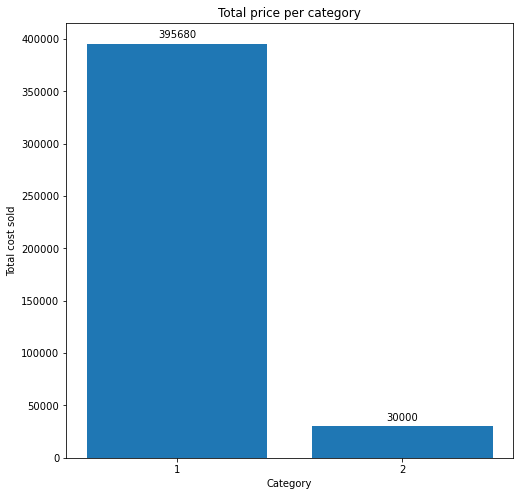

In [26]:
plt.figure(figsize=(8,8))
plot = plt.bar(r.index,r.values)
plt.xticks(r.index)
plt.bar_label(plot,padding=4)
plt.title('Total price per category')
plt.xlabel('Category')
plt.ylabel('Total cost sold')

Text(0, 0.5, 'Quantity sold')

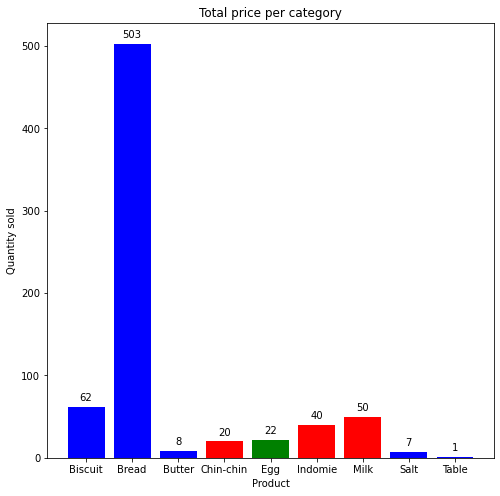

In [55]:
q = purchase_data.groupby('product').sum()[['quantity','categorykey']]
plt.figure(figsize=(8,8))
color = ['red' if i == 1 else 'blue' if i == 2 else 'green' for i in q['categorykey']]
plot = plt.bar(q.index,q.quantity,color=color)
#sns.barplot(data=q, x =q.index, y = 'quantity', hue='categorykey')
plt.xticks(q.index)
plt.bar_label(plot,padding=4)
plt.title('Total Quantity per product')
plt.xlabel('Product')
plt.ylabel('Quantity sold')


In [36]:
p = purchase_data.groupby('product').sum()[['quantity','categorykey']]
p.quantity

product
Biscuit       62
Bread        503
Butter         8
Chin-chin     20
Egg           22
Indomie       40
Milk          50
Salt           7
Table          1
Name: quantity, dtype: int64

In [43]:
color = ['red' if i%2 == 0 else 'blue' if i==1 else 'green' for i in range (5)]
color

['red', 'blue', 'red', 'green', 'red']